# Home assigment 1

Please give your name below:

In [ ]:
name='Alexander Hedene'

## Exercise 1

In nature Uranium is commonly available in the form of two isotopes: $^{235}U$ and $^{238}U$. Let us define Uranium enrichment as:
\begin{equation}
\epsilon= \frac{N_{^{235}U}}{N_{^{235}U}+N_{^{238}U}}
\end{equation}

where $N$ indicates the number of atoms in a given volume. The half-lives are $4.51 \times 10^9$ and $7.13 \times 10^8$ yr for $^{238}U$ and $^{235}U$, respectively. Today, the natural enrichment is $0.72 \%$, whereas a typical LWR fuel has an enrichment of $2-5 w\%$. It is notable that in the past natural uranium contained enough $^{235}U$ that LWRs could have been built without requiring further enrichment. In fact, evidance shows that cca $1.7 \times 10^9$ yr ago at certain locations such as in Oklo, Gabon the conditions were ideal for the formation of [natural nuclear fission reactors](https://en.wikipedia.org/wiki/Natural_nuclear_fission_reactor). 

- Derive the equation that describes the evolution of the enrichment in time. (hint: use markdown and Latex to document your derivation)
- Define a program function which evaluates the enrichment at a certain time in the past. The function should be able to handle array-like inputs (hint: you can use numpy). 
- Evaluate the function and print the enrichment 
    - at the birth of Earth ($4.5 \times 10^9$ years ago)
    - at the time when the Oklo reactor "operated" ($1.7 \times 10^9$ years ago)
- Plot the enrichment of uranium versus time in the past. Include a vertical line (`plt.axvline`) at the two times highlighted above


### Solution

Include your derivation here.

## Derivation of enrichment in time for uranium in a closed system

To determine the enrichment of uranium, one first needs to understand how each isotope changes over time. Since they are fully separate, and U-235 is not a daughter of U-238, we can treat them as two isolated cases.

First, we need the decay formula in a closed system:

$$
N(t) = N_0 \cdot \left( \frac{1}{2} \right)^{\frac{t}{T_{1/2}}},
$$

where $N(t)$ is the number of nuclei at time $t$, $N_0$ is the initial condition, and $T_{1/2}$ is the half-life of the isotope.

The enrichment of uranium is described as:

$$
\epsilon(t) = \frac{N_{U235}}{N_{U235} + N_{U238}},
$$
where $\epsilon(t)$ is the enrichment over time.
By substituting the decay formula for both isotopes in the enrichment formula, we get how the enrichment is dependent on time:

$$
\epsilon(t) = \frac{N_0^{U235} \cdot \left( \frac{1}{2} \right)^{\frac{t}{T_{1/2}^{U235}}}}{N_0^{U235} \cdot \left( \frac{1}{2} \right)^{\frac{t}{T_{1/2}^{U235}}} + N_0^{U238} \cdot \left( \frac{1}{2} \right)^{\frac{t}{T_{1/2}^{U238}}}}
$$

 It should be noted that since this is a closed system, the time can be both positive and negative.

 For simplicity this function can be rewritten to handle a inital enrichment instead of $N_0$:

 $$
\epsilon(t) = \frac{\left( \frac{1}{2} \right)^{\frac{t}{T_{1/2}^{U235}}}}{\left( \frac{1}{2} \right)^{\frac{t}{T_{1/2}^{U235}}} + \frac{1 - \epsilon_0}{\epsilon_0} \cdot \left( \frac{1}{2} \right)^{\frac{t}{T_{1/2}^{U238}}}}
$$






The enrichment at the birth of earth at time: 4.5e+9 years is: 22.39%
The enrichment at the time of the Okla reactor operated: 1.7e+9 years is: 2.83%


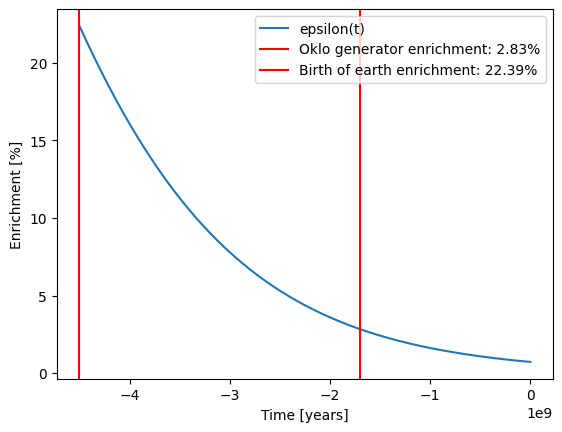

In [23]:
# include your code here
import numpy as np
import matplotlib.pyplot as plt

def epsilon(t):
    """Function to evaluate Uranium enrichment at time t. The parameter t can be both float or array. t should have the unit [years]"""
    hl_U235 = 7.13e+8
    hl_U238 = 4.51e+9
    eps_0 = 0.0072
    
    
    eps = lambda t: (1/2)**(t/hl_U235) / ((1/2)**(t/hl_U235) + (1-eps_0)/eps_0*(1/2)**(t/hl_U238))
    
    return eps(t)

print(f'The enrichment at the birth of earth at time: 4.5e+9 years is: {epsilon(-4.5e+9)*100:.2f}%')
print(f'The enrichment at the time of the Okla reactor operated: 1.7e+9 years is: {epsilon(-1.7e+9)*100:.2f}%')

t = np.linspace(-4.5*10**9, 0, int(4.5*10**6))
eps = epsilon(t)

figure = plt.figure()
plt.plot(t,eps*100, label='epsilon(t)')
plt.ylabel('Enrichment [%]')
plt.xlabel('Time [years]')
plt.axvline(x=-1.7e+9, color = 'red', label=f'Oklo generator enrichment: {epsilon(-1.7e+9)*100:.2f}%')
plt.axvline(x=-4.5e+9, color = 'red', label=f'Birth of earth enrichment: {epsilon(-4.5e+9)*100:.2f}%')
plt.legend()
plt.show()



